# MODELIZACIÓN PARA NO SUPERVISADO

## IMPORTAR PAQUETES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [1]:
ruta_proyecto = r'C:\Users\iagzg\Desktop\D4FB\D4FB\EstructuraDirectorio\03_MACHINE_LEARNING\06-MACHINE LEARNING PROJECT FRAMEWORK\CASOS\04_BANK\\'

Nombres de los ficheros de datos.

In [4]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [5]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

In [6]:
df

,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,trabajo_management,trabajo_retired,trabajo_self-employed,trabajo_services,trabajo_student,trabajo_technician,...,dia_semana_fri,dia_semana_mon,dia_semana_thu,dia_semana_tue,dia_semana_wed,educacion_oe_mms,resultado_campana_anterior_oe_mms,edad_disc_ds_mms,variacion_tasa_empleo_bin_mms,y
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.44,0.00,0.60,1.00,0
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.22,0.00,0.40,1.00,0
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.56,0.00,0.60,1.00,0
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.44,0.00,0.00,1.00,0
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.40,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25621,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.67,0.00,0.20,0.00,0
25622,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.67,0.00,0.20,0.00,1
25623,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.56,0.00,0.40,0.00,0
25624,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,0.56,0.00,0.40,0.00,1


## MODELIZAR

### Crear el espacio de soluciones

In [7]:
min_k = 3
max_k = 7

soluciones = list(range(min_k,max_k))

### Crear listas para guardar la salida de cada métrica

In [8]:
codo = []
silueta = []
calins = []
davies = []

### Analizar el espacio de soluciones

In [10]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### Identificar la mejor solucion

#### Analizar las métricas

In [11]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,97325.20,0.12,3053.32,2.58
4,92443.50,0.12,2593.96,2.63
5,88536.10,0.11,2313.94,2.60
6,86203.28,0.11,2039.84,2.65


#### Analizar los gráficos

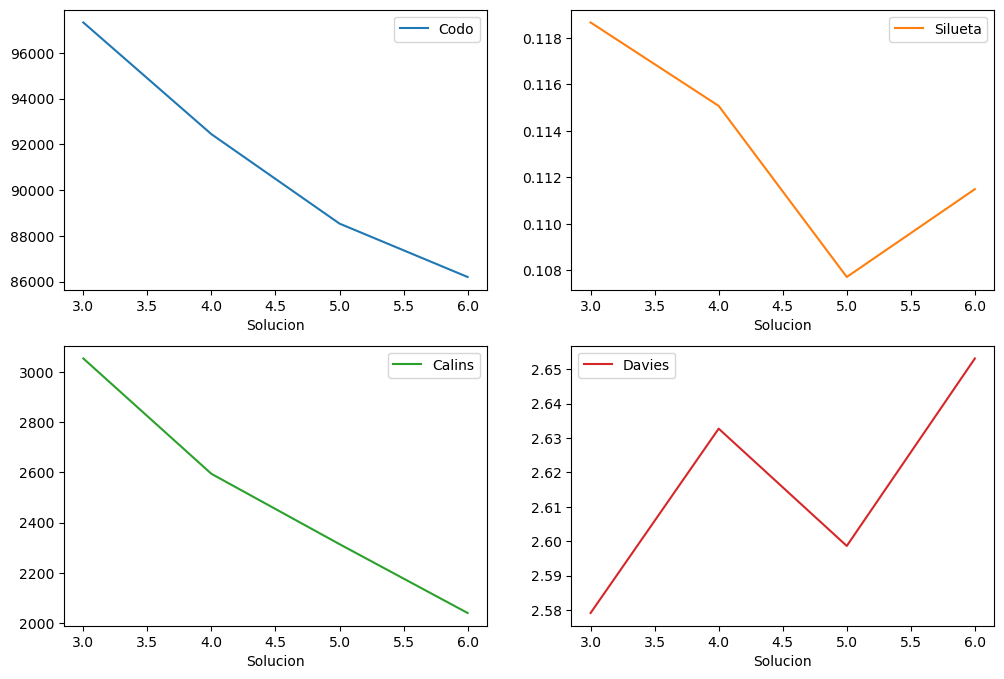

In [12]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

### Segmentación final con la mejor solucion

In [14]:
mejor_solucion = 3

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=3, n_init=10)

### Calcular el segmento en entrenamiento y en validación

In [16]:
df['segmento'] = cluster.predict(df)

In [17]:
df

,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,trabajo_management,trabajo_retired,trabajo_self-employed,trabajo_services,trabajo_student,trabajo_technician,...,dia_semana_mon,dia_semana_thu,dia_semana_tue,dia_semana_wed,educacion_oe_mms,resultado_campana_anterior_oe_mms,edad_disc_ds_mms,variacion_tasa_empleo_bin_mms,y,segmento
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.44,0.00,0.60,1.00,0,1
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.22,0.00,0.40,1.00,0,1
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.56,0.00,0.60,1.00,0,1
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.44,0.00,0.00,1.00,0,1
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,0.40,1.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25621,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.67,0.00,0.20,0.00,0,0
25622,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.67,0.00,0.20,0.00,1,2
25623,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.56,0.00,0.40,0.00,0,0
25624,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.56,0.00,0.40,0.00,1,0


## PERFILAR LOS SEGMENTOS

In [18]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2
trabajo_admin.,0.268533,0.215642,0.269439
trabajo_blue-collar,0.203105,0.278787,0.204181
trabajo_entrepreneur,0.031481,0.041581,0.036390
trabajo_housemaid,0.025098,0.028580,0.022343
trabajo_management,0.078050,0.066756,0.067913
trabajo_retired,0.042362,0.033533,0.038713
trabajo_self-employed,0.036124,0.036009,0.033514
trabajo_services,0.087625,0.109265,0.090698
trabajo_student,0.022342,0.012794,0.020684
trabajo_technician,0.178732,0.141766,0.181838


In [20]:
df_tablon2 = df.copy()

In [22]:
ruta_df_tablon2 = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'df_tablon2.pickle'

In [23]:
df_tablon2.to_pickle(ruta_df_tablon2)